In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import folium

## Import Data File

In [2]:
# Mining Data
mining_df = pd.read_csv('../Output/industry/mining.csv')
# Drilling Data
drill_df = pd.read_csv('../Output/industry/drilling.csv')
# Arrival Data
## Quarter
arrive_df = pd.read_csv('../Output/industry/arrival.csv')
## Monthly
arrive_m_df = pd.read_csv('../Output/industry/m_arrive.csv') 
# Departure Data
## Quarter
depart_df = pd.read_csv('../Output/industry/departure.csv')
## Monthly
depart_m_df = pd.read_csv('../Output/industry/m_depart.csv') 
# C19 Quarterly Data
c19_q = pd.read_csv('../Output/industry/Q_C19_AU_2018_2021.csv')
# C19 Monthly Data
c19_m = pd.read_csv('../Output/industry/M_C19_AU_2018_2021.csv')


# CoVID-19 Data
- Quarterly (mining and travel)
- Monthly (travel), and 
- for Choropleth (sum of total)

In [3]:
# convert quarterly data covid to suit mining and travel industries
# mining = 12 Q, travel = 13 Q


# Mining Data
# Select column so correspond to the metric data. ACT will be removed for mining 
c19_q_df = c19_q[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','AU', 'Quarter']]
c19_q_mining = c19_q_df.iloc[:12,:]

c19_q_mining = c19_q_mining.set_index('Quarter')
c19_q_mining

,NSW,VIC,QLD,SA,WA,TAS,NT,AU
Quarter,,,,,,,,
Q1_2018,0,0,0,0,0,0,0,0
Q2_2018,0,0,0,0,0,0,0,0
Q3_2018,0,0,0,0,0,0,0,0
Q4_2018,0,0,0,0,0,0,0,0
Q1_2019,0,0,0,0,0,0,0,0
Q2_2019,0,0,0,0,0,0,0,0
Q3_2019,0,0,0,0,0,0,0,0
Q4_2019,0,0,0,0,0,0,0,0
Q1_2020,2032,917,743,337,364,69,17,4559


In [4]:
# For Travel Data

# Re-arrange Data
c19_q_travel = c19_q[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT','AU', 'Quarter']]
# Remove April 2021
c19_q_travel = c19_q_travel.iloc[:-1,:]
# Set index to Quarter
c19_q_travel = c19_q_travel.set_index('Quarter')
c19_q_travel.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Quarter,,,,,,,,,
Q1_2018,0,0,0,0,0,0,0,0,0
Q2_2018,0,0,0,0,0,0,0,0,0
Q3_2018,0,0,0,0,0,0,0,0,0
Q4_2018,0,0,0,0,0,0,0,0,0
Q1_2019,0,0,0,0,0,0,0,0,0


In [5]:
# Monthly Data

# For Travel
# Re-arrange Data
c19_m_travel = c19_m[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT','AU', 'Month']]
# Remove April 2021
c19_m_travel = c19_m_travel.iloc[:-1,:]
# Set index to Month
c19_m_travel = c19_m_travel.set_index('Month')
c19_m_travel.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Month,,,,,,,,,
01_2018,0,0,0,0,0,0,0,0,0
02_2018,0,0,0,0,0,0,0,0,0
03_2018,0,0,0,0,0,0,0,0,0
04_2018,0,0,0,0,0,0,0,0,0
05_2018,0,0,0,0,0,0,0,0,0


In [6]:
# Data for Choropleth
c19_df = pd.DataFrame(c19_q[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT']].sum())
c19_df = c19_df.reset_index()
# Create State ID for choropleth plot
c19_df['State ID'] = [i for i in range(8)] 
c19_df.columns = ['State', 'Cases', 'State ID']
c19_df.to_csv('../Output/industry/C19_AU.csv')
c19_df

,State,Cases,State ID
0,NSW,5402,0
1,VIC,20504,1
2,QLD,1520,2
3,SA,693,3
4,WA,982,4
5,TAS,234,5
6,NT,136,6
7,ACT,123,7


# Mining and Petroleum Data

Only quarter

In [7]:
mining = mining_df.iloc[:,1:10]
mining = mining.set_index('Quarter')
mining.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,AU
Quarter,,,,,,,,
Q1_2018,61.0,18.4,56.8,14.1,261.0,4.7,22.5,438.5
Q2_2018,68.5,24.5,70.3,19.7,349.8,6.7,28.3,567.8
Q3_2018,56.7,22.4,86.1,20.4,361.0,5.3,32.5,584.4
Q4_2018,61.2,28.3,90.3,21.9,346.3,4.8,39.9,592.7
Q1_2019,61.8,24.4,51.7,16.5,319.5,3.7,27.0,504.6


In [8]:
drill = drill_df.iloc[:,1:10]
drill = drill.set_index('Quarter')
drill.head()

,Onshore,Offshore
Quarter,,
Q1_2018,76.6,106.7
Q2_2018,91.9,224.2
Q3_2018,99.7,208.2
Q4_2018,130.5,222.0
Q1_2019,94.1,128.4


# Travel Data

- Quarterly
- Monthly

In [9]:
arrive = arrive_df.iloc[:,1:]
arrive = arrive.set_index('Quarter')
arrive

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Quarter,,,,,,,,,
Q1_2018,2264540,1478110,1009060,139500,591850,9330,38810,13660,5545340
Q2_2018,1859650,1255830,892100,108610,500010,10,37590,11880,4665990
Q3_2018,2136460,1483730,1051700,139680,587500,0,42360,12170,5454430
Q4_2018,2219700,1497420,1001920,137420,576590,9670,40080,9890,5493170
Q1_2019,2286190,1582830,1017510,144390,585240,11710,37550,9320,5675200
Q2_2019,1930310,1343030,913030,121990,505380,3440,40430,9680,4867600
Q3_2019,2135730,1529090,1067850,161450,589630,0,51850,11390,5547530
Q4_2019,2197510,1532980,1043400,151130,604890,10270,49730,9490,5599880
Q1_2020,1843790,1306030,876930,131740,536100,15310,37340,6740,4754410


In [10]:
depart = depart_df.iloc[:,1:]
depart = depart.set_index('Quarter')
depart

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Quarter,,,,,,,,,
Q1_2018,2264540,1478110,1009060,139500,591850,9330,38810,13660,5545340
Q2_2018,1859650,1255830,892100,108610,500010,10,37590,11880,4665990
Q3_2018,2136460,1483730,1051700,139680,587500,0,42360,12170,5454430
Q4_2018,2219700,1497420,1001920,137420,576590,9670,40080,9890,5493170
Q1_2019,2286190,1582830,1017510,144390,585240,11710,37550,9320,5675200
Q2_2019,1930310,1343030,913030,121990,505380,3440,40430,9680,4867600
Q3_2019,2135730,1529090,1067850,161450,589630,0,51850,11390,5547530
Q4_2019,2197510,1532980,1043400,151130,604890,10270,49730,9490,5599880
Q1_2020,1843790,1306030,876930,131740,536100,15310,37340,6740,4754410


# Travel Data

## - Monthly Data

In [23]:
arrive_m = arrive_m_df[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT','AU', 'Month']]
arrive_m = arrive_m.set_index('Month')
arrive_m.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Month,,,,,,,,,
1_2018,863050,556050,385950,59170,238110,4180,17670,5520,2129950
2_2018,712280,472760,305220,41800,178580,4950,11180,3900,1730770
3_2018,689210,449300,317890,38530,175160,200,9960,4240,1684620
4_2018,668550,454770,317150,36650,174350,10,13090,5180,1669910
5_2018,602770,387800,281320,35660,160380,0,10310,3100,1481410


In [24]:
depart_m = depart_m_df[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT','AU', 'Month']]
depart_m = depart_m.set_index('Month')
depart_m.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Month,,,,,,,,,
1_2018,863050,556050,385950,59170,238110,4180,17670,5520,2129950
2_2018,712280,472760,305220,41800,178580,4950,11180,3900,1730770
3_2018,689210,449300,317890,38530,175160,200,9960,4240,1684620
4_2018,668550,454770,317150,36650,174350,10,13090,5180,1669910
5_2018,602770,387800,281320,35660,160380,0,10310,3100,1481410


 # Data for Choropleth

 - Covid Data

In [13]:
total_c19 = pd.DataFrame(c19_q_travel.sum())
total_c19

,0
NSW,5296
VIC,20484
QLD,1477
SA,656
WA,944
TAS,234
NT,108
ACT,123
AU,29322


In [14]:
print(len(mining), len(c19_q_mining))

12 12


# Plot the data against COVID 19 Data

In [26]:
def mysubplot(x1_data,y1_data, y2_data, xlabel, y1_label, y2_label, xticklabel, xlim, fname):
    '''
    mysubplot is to plot 2 graphs with the same x-axis, in 2 y-axis.
    prefix - 1 is for the first data
    prefix - 2 is for the 2nd data
    xticklabel - is for labelling the x-axis
    xlim - is limitation for x-axis, for the following:
        11 - mining and petroleum
        12 - arrival and departure
    '''
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(x1_data, y1_data, color="red", marker="o")
    # set x-axis label
    ax.set_xlabel("Year",fontsize=14)
    # set y-axis label
    ax.set_ylabel(y1_label,color="red",fontsize=14)

    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(x1_data, y2_data,color="blue",marker="o")
    ax2.set_ylabel(y2_label,color="blue",fontsize=14)
    # ax.set_xticks(mining.index)
    ax.set_xticklabels(labels = xticklabel, rotation = 90)
    ax.grid(which='major')
    ax.set_xlim(0,xlim)
    plt.show()
    # save the plot as a file
    fig.savefig(f'../Output/industry/{fname}.png',
                format='png',
                dpi=100,
                bbox_inches='tight')

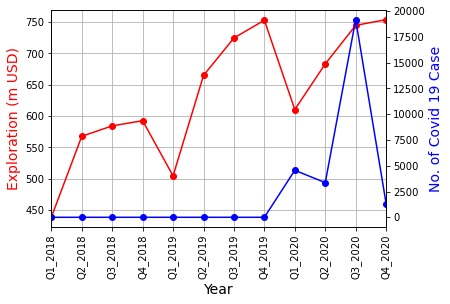

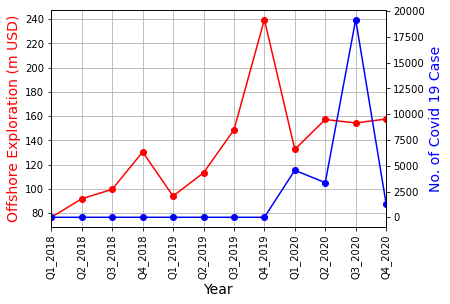

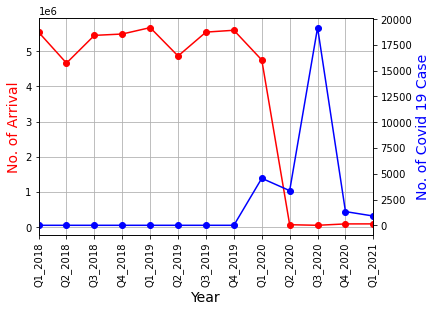

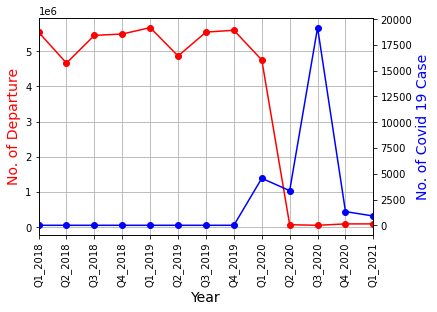

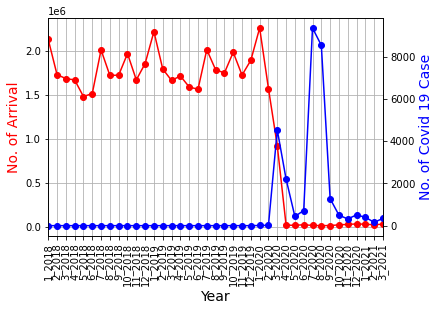

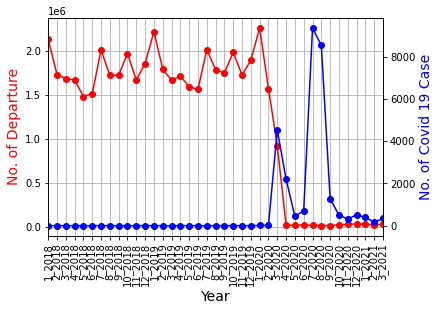

In [46]:
# Metric data
x1_data = [mining.index, drill.index, arrive.index, depart.index, arrive_m.index, arrive_m.index]
y1_data = [mining.AU, drill.Onshore, arrive.AU, depart.AU,arrive_m.AU, depart_m.AU]
y2_data = [c19_q_mining.AU, c19_q_mining.AU, c19_q_travel.AU, c19_q_travel.AU, c19_m_travel.AU, c19_m_travel.AU]
xlabel = 'Year'
y1_label = ['Exploration (m USD)', 'Offshore Exploration (m USD)', 'No. of Arrival', 'No. of Departure', 'No. of Arrival', 'No. of Departure']
y2_label = 'No. of Covid 19 Case'
fname = ['mining', 'drilling', 'arrival', 'departure', 'arrival_m', 'depart_m']
xticklabel = [mining.index, mining.index, arrive.index, arrive.index,arrive_m.index,arrive_m.index]
xlim = [11,11,12,12, 38, 38]

for i in range(len(x1_data)):
    mysubplot(x1_data[i], y1_data[i], y2_data[i], xlabel, y1_label[i], y2_label, xticklabel[i], xlim[i], fname[i])

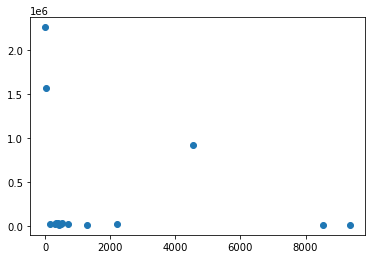

In [96]:
# Correlation Plot
plt.scatter(c19_m_travel[-15:].AU,arrive_m[-15:].AU)

# indexing = c19_m_travel[-15:].index 
# indexing


# mm = arrive_m[-15:].set_index([pd.Index(indexing)])
# mm

# dataw = pd.DataFrame({'c19': c19_m_travel[-15:].AU, 'arrive': mm.AU})
# dataw

The r-squared is: 0.030144060144905067


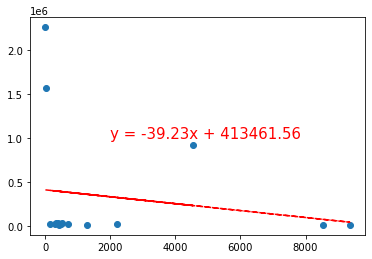

In [95]:
# plt.scatter(dataw.c19,dataw.arrive)
n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = st.linregress(dataw.c19,dataw.arrive)
n_temp_fit = n_temp_slope * dataw.c19 + n_temp_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(n_temp_slope,2)) + "x + " + str(round(n_temp_int,2))
plt.plot(dataw.c19,n_temp_fit,"--", color = 'red')
plt.scatter(dataw.c19, dataw.arrive)
plt.annotate(line_eq,(2000,1e6),fontsize=15,color="red")
print(f"The r-squared is: {n_temp_r**2}")

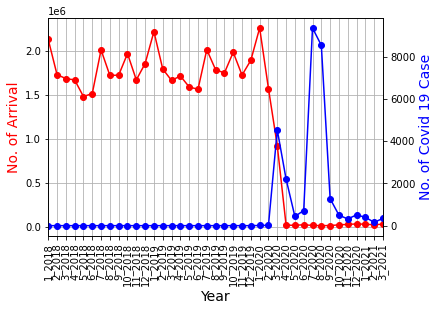

In [44]:
# plt.plot(c19_m_travel.AU)
# arrive_m
# len(arrive_m)
# plt.plot(arrive_m.AU)

# c19_m_travel
# Metric data
x1_data = [arrive_m.index]
y1_data = [arrive_m.AU]
y2_data = [c19_m_travel.AU]
xlabel = 'Year'
y1_label = ['No. of Arrival']
y2_label = 'No. of Covid 19 Case'
fname = ['arrival_m']
xticklabel = [arrive_m.index]
xlim = [38]

for i in range(len(x1_data)):
    mysubplot(x1_data[i], y1_data[i], y2_data[i], xlabel, y1_label[i], y2_label, xticklabel[i], xlim[i], fname[i])

In [17]:
c19_q_mining

,NSW,VIC,QLD,SA,WA,TAS,NT,AU
Quarter,,,,,,,,
Q1_2018,0,0,0,0,0,0,0,0
Q2_2018,0,0,0,0,0,0,0,0
Q3_2018,0,0,0,0,0,0,0,0
Q4_2018,0,0,0,0,0,0,0,0
Q1_2019,0,0,0,0,0,0,0,0
Q2_2019,0,0,0,0,0,0,0,0
Q3_2019,0,0,0,0,0,0,0,0
Q4_2019,0,0,0,0,0,0,0,0
Q1_2020,2032,917,743,337,364,69,17,4559


In [18]:
# plt.scatter(c19_q_mining.AU, mining.AU)
# import scipy.stats as st

# n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = st.linregress(c19_q_mining['AU'], mining['AU'])
# n_temp_fit = n_temp_slope * c19_q_mining + n_temp_int
# # Create equation of line to predict temp based on latitude coordinate
# line_eq = "y = " + str(round(n_temp_slope,2)) + "x + " + str(round(n_temp_int,2))
# plt.plot(c19_q_mining.AU,n_temp_fit,"--", color = 'red')
# plt.scatter(c19_q_mining.AU, mining.AU)
# plt.annotate(line_eq,(20,20),fontsize=15,color="red")
# plt.title('Northern Hemishpere City Vs. Max Temp (24/04/21)')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp (F)')
# plt.grid(which = 'major', axis = 'both')
# plt.savefig('Figures\\N_lat_vs_temp.png')
# print(f"The r-squared is: {n_temp_r**2}")

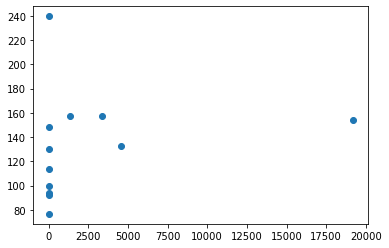

In [19]:
plt.scatter(c19_q_mining.AU, drill.Onshore)

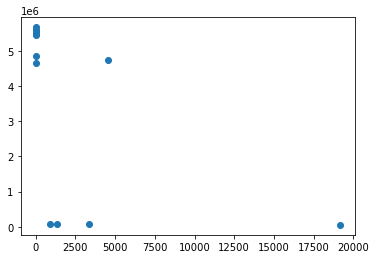

In [20]:
plt.scatter(c19_q_travel.AU, arrive.AU)

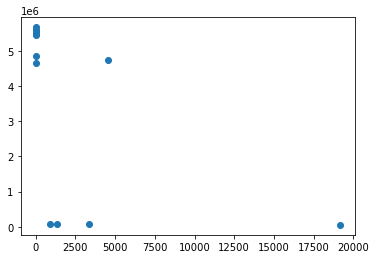

In [21]:
plt.scatter(c19_q_travel.AU, depart.AU)

The r-squared is: 0.28031331618564775


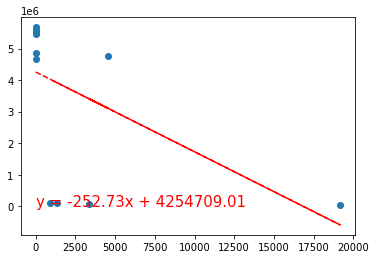

In [22]:
n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = st.linregress(c19_q_travel['AU'], arrive['AU'])
n_temp_fit = n_temp_slope * c19_q_travel.AU + n_temp_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(n_temp_slope,2)) + "x + " + str(round(n_temp_int,2))
plt.plot(c19_q_travel.AU,n_temp_fit,"--", color = 'red')
plt.scatter(c19_q_travel.AU, arrive.AU)
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
# plt.title('Northern Hemishpere City Vs. Max Temp (24/04/21)')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp (F)')
# plt.grid(which = 'major', axis = 'both')
# plt.savefig('Figures\\N_lat_vs_temp.png')
print(f"The r-squared is: {n_temp_r**2}")